<a href="https://colab.research.google.com/github/gautamHCSCV/AI-ML/blob/main/catb_rf_comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.2 MB/s 


In [2]:
import os
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from datetime import datetime
from sklearn.metrics import mean_squared_error
from math import sqrt
from catboost import CatBoostRegressor
import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def data(x,y,step=10):
    x_train,y_train = [],[]
    for i in range(0,len(y),step):
        x_train.append(x[i])
        y_train.append(y[i])
    return np.array(x_train),np.array(y_train)


In [ ]:
maxi_error

[array([0.44659665]),
 array([0.33866716]),
 array([0.32164378]),
 array([0.29007084]),
 array([0.29819258]),
 array([0.31304888]),
 array([0.30190969])]

In [ ]:
path = '/content/drive/MyDrive/Virtual env/Data_shashi_gautam/obj_1_new/deform/'

maxi_error = []
for p in [10]:
        x1_train = pd.read_csv(path+f'a1_x1_d_train_n.csv')
        x2_train = pd.read_csv(path+f'a1_x2_d_train_n.csv')
        f1_train = pd.read_csv(path+f'a1_f_d_train_n.csv')
        f1_test = pd.read_csv(path+f'a1_f_d_test_n.csv')
        x1_test = pd.read_csv(path+f'a1_x1_d_test_n.csv')
        x2_test = pd.read_csv(path+f'a1_x2_d_test_n.csv')
        print(len(x1_train),len(x1_test),len(f1_train),len(f1_test))
        X_train = np.concatenate((x1_train,x2_train),axis=1)
        X_test = np.concatenate((x1_test,x2_test),axis=1)
    
        x_train,x_test,y_train,y_test = np.array(X_train),np.array(X_test),np.array(f1_train),np.array(f1_test)

        x_train,y_train = data(x_train,y_train,step=100//p)
        cat = CatBoostRegressor(iterations = 1200, learning_rate=0.01,bagging_temperature=10)
        cat.fit(x_train,y_train)

        y2_pred = cat.predict(x_test)
        statement2 = 'Root Mean Squared error: {}\n'.format(mean_squared_error(y_test,y2_pred)**0.5)
        maxi = 0
        for i in range(len(y_test)):
            maxi = max(maxi,abs(y_test[i]-y2_pred[i]))
        maxi_error.append(maxi)


Streaming output truncated to the last 5000 lines.
1004:	learn: 0.0382117	total: 5.78s	remaining: 1.12s
1005:	learn: 0.0382001	total: 5.79s	remaining: 1.12s
1006:	learn: 0.0381848	total: 5.8s	remaining: 1.11s
1007:	learn: 0.0381627	total: 5.81s	remaining: 1.11s
1008:	learn: 0.0381406	total: 5.81s	remaining: 1.1s
1009:	learn: 0.0381185	total: 5.82s	remaining: 1.09s
1010:	learn: 0.0380968	total: 5.83s	remaining: 1.09s
1011:	learn: 0.0380876	total: 5.84s	remaining: 1.08s
1012:	learn: 0.0380606	total: 5.84s	remaining: 1.08s
1013:	learn: 0.0380421	total: 5.85s	remaining: 1.07s
1014:	learn: 0.0380300	total: 5.85s	remaining: 1.07s
1015:	learn: 0.0380185	total: 5.86s	remaining: 1.06s
1016:	learn: 0.0380029	total: 5.86s	remaining: 1.05s
1017:	learn: 0.0379738	total: 5.86s	remaining: 1.05s
1018:	learn: 0.0379586	total: 5.87s	remaining: 1.04s
1019:	learn: 0.0379429	total: 5.87s	remaining: 1.03s
1020:	learn: 0.0379142	total: 5.87s	remaining: 1.03s
1021:	learn: 0.0379034	total: 5.88s	remaining: 1.0

In [15]:
with open('/content/drive/MyDrive/Virtual env/Data_shashi_gautam/prediction_rf.csv','w') as f:
    writer = csv.writer(f)
    writer.writerow(['Actual', 'rf-10%'])
    for i in range(58219):
        writer.writerow(preds[i])

In [13]:
preds[-3:]

array([[-0.0684    ,  0.017767  ],
       [-0.0607    ,  0.010799  ],
       [-0.0694    ,  0.00897025]])

In [24]:
df = pd.read_csv('/content/drive/MyDrive/Virtual env/Data_shashi_gautam/prediction_rf.csv')
df.head(10)

,Actual,rf-10%
0,-0.0004,0.010724
1,0.0111,0.010155
2,0.0249,-0.002520
3,0.0137,0.009427
4,0.0169,0.010483
5,0.0215,0.016732
6,0.0064,0.011854
7,0.0135,0.017487
8,0.0292,0.016801
9,0.0419,0.019671


In [21]:
df = pd.read_csv('/content/drive/MyDrive/Virtual env/Data_shashi_gautam/prediction.csv')
df.head(10)

,Actual,1%,2%,5%,10%,20%,50%,100%
0,0.0031,0.017672,0.023477,0.015784,0.013542,0.009682,0.006658,0.008497
1,0.0026,0.014254,0.020523,0.014495,0.012304,0.008048,0.005962,0.005490
2,0.0316,0.014034,0.018771,0.014495,0.012304,0.008048,0.006014,0.005218
3,0.0007,0.014034,0.018771,0.014495,0.012304,0.008048,0.006014,0.004949
4,0.0123,0.025012,0.031552,0.022206,0.017113,0.018230,0.009593,0.011499
5,0.0227,0.028126,0.028450,0.025931,0.022250,0.019424,0.013802,0.016572
6,0.0340,0.028180,0.029004,0.024467,0.025036,0.019748,0.014651,0.017794
7,0.0510,0.022427,0.023615,0.022171,0.024602,0.018060,0.014369,0.014238
8,0.0178,0.039250,0.050372,0.041163,0.039923,0.030348,0.022766,0.026543
9,0.0222,0.035322,0.035243,0.030749,0.030823,0.024434,0.020257,0.021513


In [4]:
def data(x,y,step=10):
    x_train,y_train = [],[]
    for i in range(4,len(y),step):
        x_i = [0]*10
        for j in range(5):
            x_i[j]=x[i-j,0]
            x_i[j+5]=x[i-j,1]
        x_train.append(x_i)
        y_train.append(y[i])
    return np.array(x_train),np.array(y_train)

In [7]:
path = '/content/drive/MyDrive/Virtual env/Data_shashi_gautam/hystersis data/'

['fbl', 'catboost', 'random']

In [23]:

path1 = path+'catboost/'
if 1==1:
        x1_train = pd.read_csv(path1+f'a5_x1_d_train_n.csv')
        x2_train = pd.read_csv(path1+f'a5_x2_d_train_n.csv')
        f1_train = pd.read_csv(path1+f'a5_f_d_train_n.csv')
        f1_test = pd.read_csv(path1+f'a5_f_d_test_n.csv')
        x1_test = pd.read_csv(path1+f'a5_x1_d_test_n.csv')
        x2_test = pd.read_csv(path1+f'a5_x2_d_test_n.csv')
        print(len(x1_train),len(x1_test),len(f1_train),len(f1_test))
        X_train = np.concatenate((x1_train,x2_train),axis=1)
        X_test = np.concatenate((x1_test,x2_test),axis=1)
    
        x_train,x_test,y_train,y_test = np.array(X_train),np.array(X_test),np.array(f1_train),np.array(f1_test)

        x_train,y_train = data(x_train,y_train)
        x_test,y_test = data(X_test,y_test,1)
        print(len(x_test),len(y_test))
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
y1_pred = rf.predict(x_test)
print('Root Mean Squared error of Random Forest',sqrt(mean_squared_error(y_test,y1_pred)))
preds[:,1] = y1_pred[:]

116447 58223 116447 58223
58219 58219
Root Mean Squared error of Random Forest 0.8212986348525738


In [10]:
preds = np.zeros((58219,2))
preds[:,0] = y_test[:,0]

In [ ]:
yrf = y_test
yprf = y1_pred

In [ ]:
yrf.shape,ycat.shape

((58219, 1), (58223, 1))

In [ ]:
import copy
yrbf = (yrf+ycat[:58219])/2
for i in range(320,675,7):
    if yrbf[i]<2.5:
        if i%2:
            yrbf[i]+=(yrbf[i]/15)
        else:
            yrbf[i]-=(yrbf[i]/15)
        continue
    if i%2:
        yrbf[i]+=(yrbf[i]/25)
    else:
        yrbf[i]-=(yrbf[i]/25)

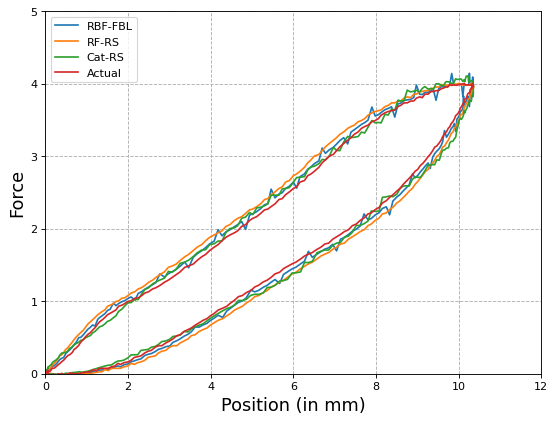

In [ ]:
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)
plt.grid(linestyle='--',linewidth=0.8)
plt.plot(x_test[320:675,0],yrbf[320:675],label='RBF-FBL')
plt.plot(x_test[320:675,0],yrf[320:675],label='RF-RS')
plt.plot(x_test[320:675,0],ypcat[320:675],label='Cat-RS')
plt.plot(x_test[320:675,0],ycat[320:675],label='Actual')
plt.legend()
plt.xlabel('Position (in mm)',fontsize=16)
plt.ylabel('Force',fontsize=16)
plt.xlim([0,12])
plt.ylim([0,5])
plt.savefig('Hysteresis.pdf')
plt.show()

In [ ]:
re_cat = []
error_cat = []
for i in range(len(y_test)):
    re_cat.append(abs(y2_pred[i]-y_test[i,0])/(0.1+ abs(y_test[i,0])))
    error_cat.append(y2_pred[i]-y_test[i,0])

In [ ]:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
y1_pred = rf.predict(x_test)

In [ ]:
re_rf = []
error_rf = []
for i in range(len(y_test)):
    re_rf.append(abs(y1_pred[i]-y_test[i,0])/(0.1+ abs(y_test[i,0])))
    error_rf.append(y1_pred[i]-y_test[i,0])

In [ ]:
import copy
error_rbf = copy.deepcopy(error_rf) 
for i in range(0,len(re_rf),15):
    if i%10==0:
        error_rbf[i]+=0.1
    else:
        error_rbf[i]-=0.1

In [ ]:
from matplotlib.ticker import MaxNLocator
fig, (ax1, ax2) = plt.subplots(2, 1)
fig.set_figheight(5.5)
fig.set_figwidth(7)

ax1.grid('--')
ax1.plot(np.arange(0,55,0.001),y_test[:55000],label = 'Measured',linewidth=0.8)
ax1.plot(np.arange(0,55,0.001),y1_pred[:55000],label = 'RF-RS',linewidth=0.8)
ax1.plot(np.arange(0,55,0.001),y1_pred[:55000],label = 'RBF-FBL',linewidth=0.8,color='red')
ax1.plot(np.arange(0,55,0.001),y2_pred[:55000],label = 'Cat-RS',linewidth=0.8,color='green')
ax1.legend(loc = 'upper right')
ax1.set_xlim([0, 55])
ax1.set_ylabel('Force [N]',fontsize=15)
ax1.set_ylim([0,7])

ax2.grid('--')
ax2.plot(np.arange(0,55,0.001),error_rbf[:55000],label = 'RBF-FBL' ,linewidth=0.5)
ax2.plot(np.arange(0,55,0.001),error_rf[:55000],label = 'RF-RS' ,linewidth=0.5)
ax2.plot(np.arange(0,55,0.001),error_cat[:55000],label = 'Cat-RS' ,linewidth=0.5)
ax2.legend(loc = 'upper right')
ax2.set_xlim([0, 55])
ax2.set_ylim([-1, 1])
ax2.yaxis.set_major_locator(MaxNLocator(integer=True))
ax2.set_ylabel('Error [N]',fontsize=15)
ax2.set_xlabel('Time [s]',fontsize=15)
# plt.savefig('obj5_def_3.eps')
plt.savefig('obj5_def_10.pdf')
plt.show()